# Stoneburner, Kurt
- ## DSC 650 - Assignment 5.2 Tensorflow Keras Multi-Class Classifier Example


https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb

There are three custom functions that are attempts at modularizing the books code:

- def build_model - Returns a Dense Sequential model based on input parameters
- def plot_model_history - Plots the loss and accuracy of a model by epoch. Loss should go down, Accuracy should go up
- def plot_model_validation = Plots the Training and Validation lass and accuracy on a model validation set

This topic-classification problem looks similar to the previous movie-review classifica-tion problem: in both cases, you’re trying to classify short snippets of text. But there is a  new  constraint  here:  the  number  of  output  classes  has  gone  from  2  to  46.  The dimensionality of the output space is much larger. In a stack of Dense layers like that you’ve been using, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottleneck. In the previous example, you used 16-dimensional intermediate layers, but a 16-dimensional space maybe too limited to learn to separate 46 different classes: such small layers may act as infor-mation bottlenecks, permanently dropping relevant information. For this reason you’ll use larger layers. Let’s go with 64 units.

There are two other things you should note about this architecture:
- You end the network with a Dense layer of size 46. This means for each inputsample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.

- The  last  layer  uses  a  softmax  activation.  You  saw  this  pattern  in  the  MNISTexample.  It  means  the  network  will  output  a  probability  distribution  over  the  46 different output classes for every input sample, the network will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1. The best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels. By minimizing the  distance  between  these  two  distributions,  you  train  the  network  to  output  something as close as possible to the true labels.

## Key Takeaways: ## 
Here’s what you should take away from this example:
- If you’re trying to classify data points among N classes, your network should endwith a Dense layer of size N.
- In  a  single-label,  multiclass  classification  problem,  your  network  should  endwith a softmax activation so that it will output a probability distribution over theN output classes.
- Categorical  crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributionsoutput by the network and the true distribution of the targets.


- There are two ways to handle labels in multiclass classification:
    - Encoding the labels via categorical encoding (also known as one-hot encoding) and using **categorical_crossentropy** as a loss function. Keras.utils.to_categorical and to_one_hot() are examples to one hot encode labels.
        
        Example using keras.utils.to_categorical:
        
            from tensorflow.keras.utils import to_categorical
            y_train = to_categorical(train_labels)
            y_test = to_categorical(test_labels)
        
        Example: Using custom to_one_hot
            
            y_train = to_one_hot(train_labels)
            y_test = to_one_hot(test_labels)

    - Encoding the labels as integers and using the **sparse_categorical_crossentropy** loss function. 
            
            y_train = np.array(train_labels)
            y_test = np.array(test_labels)
     
- If you need to classify data into a large number of categories, you should avoid creating  information  bottlenecks  in  your  network  due  to  intermediate  layers that are too small. 

In [1]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



from tensorflow import keras
from tensorflow.keras import layers

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [2]:
#//*** Utilize Plaid-ml GPU acceleration. Uncomment if using home AMD Based PC. Keep Commented if using work PC.
from os import environ

#environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import tensorflow.keras

In [3]:
#//********************************************************
#//*** Attempt to modularize a Sequential Keras Module.
#//********************************************************
def build_model(**kwargs):
    #//*** Define the Model
    from tensorflow.keras import models
    from tensorflow.keras import layers
    from tensorflow.keras import optimizers
    
    
    #//*****************************
    #//*** Set Default values
    #//*****************************
    total_layers = 2
    hidden_units = 16
    first_activation = "relu"
    final_activation='sigmoid'
    optimizer='rmsprop'  
    loss = 'mse'
    metrics=['accuracy']
    shape = None
    do_compile = True
    output_layer = 1
    
    #//*** Apply Kwargs
    for key,value in kwargs.items():
        
        if key == 'layers':
            total_layers=value

        if key == 'hidden_units':
            hidden_units=value
        
        if key == 'loss':
            loss=value
        
        if key == 'first_activation':
            first_activation=value
    
        if key == 'final_activation':
            final_activation=value
    
        if key == 'optimizer':
            optimizer=value
    
        if key == 'metrics':
            metrics=value
            
        if key == 'shape':
            shape = value

        if key == 'compile':
            do_compile = value
            
        if key == 'output_layer':
            output_layer = value
        

    model = models.Sequential()
    
    #//*** Add the First Layer. Include an Input_Shape paramter if one is included
    if shape == None:
        #//*** Add First Layer
        model.add(layers.Dense(hidden_units, activation=first_activation ))

    else:
        #//*** Add First Layer
        model.add(layers.Dense(hidden_units, activation=first_activation, input_shape=shape ))
    
    
    #//*** Add Additional Layers if total_layers greater than 2
    for x in range(total_layers-2):
        
        #//*** These are basic layers with same number of hidden units and using first_activation
        model.add(layers.Dense(hidden_units, activation=first_activation))
    
    
    
    #//*** Add Final Layer
    model.add(layers.Dense(output_layer, activation=final_activation))
    
    #//*** Compile Model
    if do_compile:
        
        model.compile(optimizer=optimizer,loss=loss,metrics=metrics)
    
    return model



In [4]:
#//********************************************************
#//*** Plot a Fitted Models History of Loss and Accuracy
#//********************************************************
def plot_model_history(input_history):
    loss = input_history.history['loss']
    acc = input_history.history['accuracy']
    
    
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, acc, "b", label="Training Accuracy")
    plt.title("Training Accuracy\nAccuracy should go up")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, "bo", label="Training Loss")
    
    plt.title("Training Loss \nLoss should go down")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
#//****************************************************************
#//*** Plot a Fitted Models History Training and Validation Loss
#//****************************************************************
def plot_model_validation(input_history):
    loss = input_history.history["loss"]
    val_loss = input_history.history["val_loss"]
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    #//*** Plot the Validation Set Accuracy
    plt.clf()
    acc = input_history.history["accuracy"]
    val_acc = input_history.history["val_accuracy"]
    plt.plot(epochs, acc, "bo", label="Training accuracy")
    plt.plot(epochs, val_acc, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

## Classifying Newswires: A Multiclass classification example ##
Import the Reuters news wires data set from Keras.
Data returns a Sparse Matrix of textual news wires that are categorizes by 46 categorizes.

In [42]:
#//*** Load this twice to remove deprecatation warnings
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)


In [6]:
#//*** Peek at the data
print(len(train_data))
print(len(test_data))
print(train_data[0])
print()
print(train_labels[:100])

8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]

[ 3  4  3  4  4  4  4  3  3 16  3  3  4  4 19  8 16  3  3 21 11  4  4  3
  3  1  3  1  3 16  1  4 13 20  1  4  4 11  3  3  3 11 16  4  4 20 18 25
 19  3  4  3  4  3  4  3  3  4  4  3  4  4  3 19 35  8  4  4  3 16 25  3
 11  3  9 16 38 10  4  4  9  3  3 28 20  3  3  3  3  3  4  4  3  4  2  3
  1  3 19  4]


In [7]:
#//*** Decode News Wires Back From Text
#//*** Can convert the sparse matrix back to text if needed
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [8]:
#//****************************************************************************************************************
#//*** Prepare the Data Using Vectorize sequences.
#//*** Each word is encoded into a 10,000 character string of zeros. One of those characters is set 
#//*** to 1 representing a specific word. Each element of the data is converted to a list of these 10,000 character
#//*** Strings.
#//*** This is essentially a manual conversion of a sparse one-hot-encoded matrix to dense encoded matrix.
#//*** The dense matrix is a collection of tensors
#//****************************************************************************************************************
#//*** Lists of integers must be converted into tensors.
def vectorize_sequences(sequences, dimension=10000):
    #//*** Builds zero filled matrix of shape dimension
    results = np.zeros((len(sequences), dimension))
    
    #//*** Assigns 1s to the specific integer for references.
    #//*** This is manual one-hot encoding
    for i, sequence in enumerate(sequences):
        
         for j in sequence:   
            results[i, j] = 1.
                
    return results

#//*** Encode the Labels. Similar to vectorize_sequences except it's a encoding a single dimension.

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


In [43]:

#//*** Encode the data to tensors (dense one-hot-encoded matrix)
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#//*** One hot encode the labels (could also use keras.utils.to_categorical)
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)



In [11]:
#//*** Test/Evaluate the model on a smaller subset to get a feel for performance
#//*** Allocate a validation subset
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#//****************************
#//*** Book Supplied Settings
#//****************************
layers = 3
hidden_units = 64
first_activation = "relu"
final_activation = "softmax"
optimizer = "rmsprop"
loss = 'categorical_crossentropy'
model = build_model(
    layers=layers, 
    hidden_units = hidden_units,
    first_activation = first_activation,
    final_activation=final_activation, 
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy'],
    #//*** Categorical Classifier, the Findal Layer should be equal to the Total Number of Classifiers
    output_layer = (np.max(train_labels) + 1)
)

#//*** Train Model on the validation set


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))




Epoch 1/20
16/16 [==============================] - 0s 21ms/step - loss: 2.7340 - accuracy: 0.5180 - val_loss: 1.8350 - val_accuracy: 0.6230
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.4978 - accuracy: 0.6896 - val_loss: 1.3589 - val_accuracy: 0.6990
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.1060 - accuracy: 0.7616 - val_loss: 1.1725 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8666 - accuracy: 0.8247 - val_loss: 1.0531 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6873 - accuracy: 0.8631 - val_loss: 0.9854 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5485 - accuracy: 0.8901 - val_loss: 0.9542 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4391 - accuracy: 0.9082 - val_loss: 0.8942 - val_accuracy: 0.8170
Epoch 8/20
16

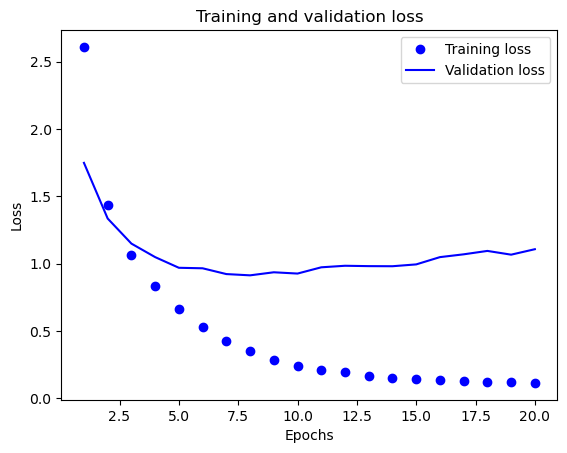

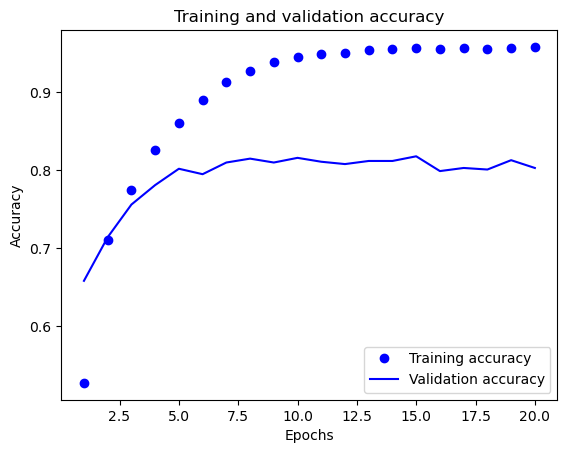

In [41]:


plot_model_validation(history)

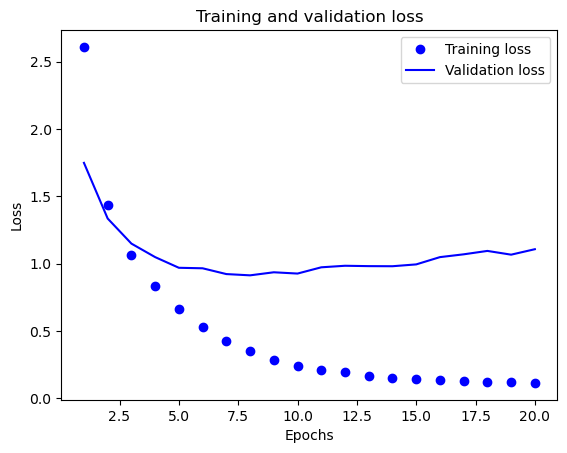

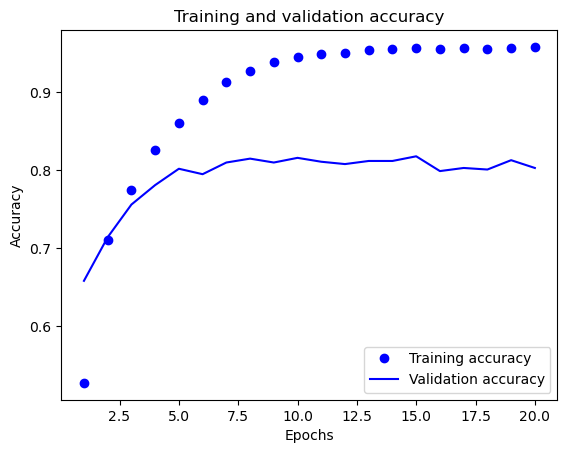

In [40]:
#//*** Plot the Validation Set Loss

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#//*** Plot the Validation Set Accuracy
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Epoch 1/20
16/16 [==============================] - 0s 20ms/step - loss: 2.6100 - accuracy: 0.5268 - val_loss: 1.7485 - val_accuracy: 0.6580
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.4363 - accuracy: 0.7106 - val_loss: 1.3349 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0656 - accuracy: 0.7751 - val_loss: 1.1485 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8346 - accuracy: 0.8255 - val_loss: 1.0482 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6635 - accuracy: 0.8608 - val_loss: 0.9688 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5291 - accuracy: 0.8906 - val_loss: 0.9651 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4221 - accuracy: 0.9131 - val_loss: 0.9221 - val_accuracy: 0.8100
Epoch 8/20
16

In [28]:
print(y_train[0][0])

0.0


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Epoch 1/9
18/18 [==============================] - 0s 11ms/step - loss: 2.4112 - accuracy: 0.5364
Epoch 2/9
18/18 [==============================] - 0s 11ms/step - loss: 1.3060 - accuracy: 0.7178
Epoch 3/9
18/18 [==============================] - 0s 10ms/step - loss: 0.9742 - accuracy: 0.7898
Epoch 4/9
18/18 [==============================] - 0s 12ms/step - loss: 0.7572 - accuracy: 0.8379
Epoch 5/9
18/18 [==============================] - 0s 11ms/step - loss: 0.5966 - accuracy: 0.8721
Epoch 6/9
18/18 [==============================] - 0s 11ms/step - loss: 0.4706 - accuracy: 0.8989
Epoch 7/9
18/18 [==============================] - 0s 11ms/step - loss: 0.3837 - accuracy: 0.9181
Epoch 8/9
18/18 [==============================] - 0s 10ms/step - loss: 0.3122 - accuracy: 0.9330
Epoch 9/9
18/18 [==============================] - 0s 10ms/step - loss: 0.2

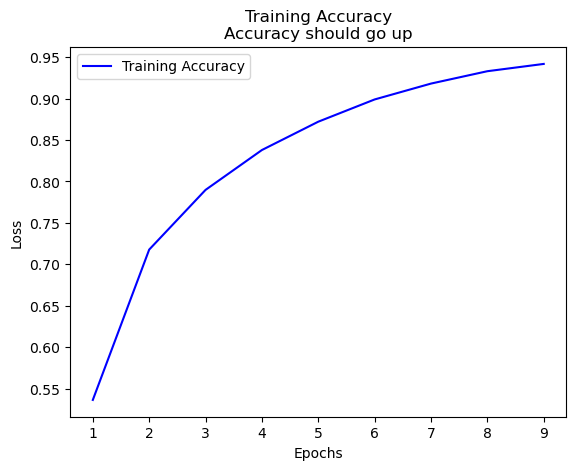

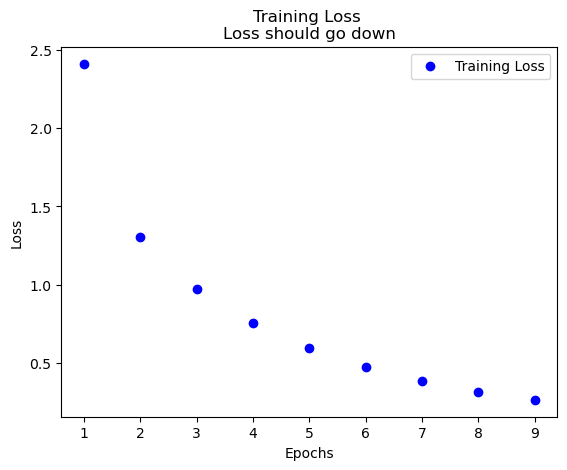

71/71 [==============================] - 0s 993us/step - loss: 0.9903 - accuracy: 0.7850


[0.9902662038803101, 0.7849510312080383]

In [38]:
#//*** Encode Labels using Keras to_categorical. Returns Sparse Matrix for the Labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
#//*** Use Loss Functions 'categorical_crossentropy' for Sparse Matrix Categoricals
#//*** Displays labels
print(y_train[0])

#//****************************
#//*** Book Supplied Settings
#//****************************
layers = 3
hidden_units = 64
first_activation = "relu"
final_activation = "softmax"
optimizer = "rmsprop"
loss = 'categorical_crossentropy'
model = build_model(
    layers=layers, 
    hidden_units = hidden_units,
    first_activation = first_activation,
    final_activation=final_activation, 
    optimizer=optimizer,
    loss=loss,metrics=['accuracy'],
    #//*** Categorical Classifier, the Findal Layer should be equal to the Total Number of Classifiers
    output_layer = (np.max(train_labels) + 1)
)
history = model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

plot_model_history(history)

results = model.evaluate(x_test, y_test)
results

In [22]:
#//*** Verify Predictions on the Test Data
predictions = model.predict(x_test)
#//*** Each entry in predictions has a Vector length of 46. This matches the total number of categories.
print(predictions[0].shape)
#//*** The Sum of each prediction should equal 1
print(np.sum(predictions[0]))

#//*** The categorical with the highestet probability in the first test entry
print(np.argmax(predictions[0]),predictions[0][np.argmax(predictions[0]) ])

(46,)
1.0000001
3 0.80857974


3
Epoch 1/9
18/18 [==============================] - 0s 11ms/step - loss: 2.5998 - accuracy: 0.5460
Epoch 2/9
18/18 [==============================] - 0s 11ms/step - loss: 1.4071 - accuracy: 0.7035
Epoch 3/9
18/18 [==============================] - 0s 11ms/step - loss: 1.0446 - accuracy: 0.7707
Epoch 4/9
18/18 [==============================] - 0s 11ms/step - loss: 0.8159 - accuracy: 0.8282
Epoch 5/9
18/18 [==============================] - 0s 10ms/step - loss: 0.6373 - accuracy: 0.8664
Epoch 6/9
18/18 [==============================] - 0s 11ms/step - loss: 0.5009 - accuracy: 0.8978
Epoch 7/9
18/18 [==============================] - 0s 11ms/step - loss: 0.4004 - accuracy: 0.9157
Epoch 8/9
18/18 [==============================] - 0s 10ms/step - loss: 0.3234 - accuracy: 0.9297
Epoch 9/9
18/18 [==============================] - 0s 9ms/step - loss: 0.2704 - accuracy: 0.9380


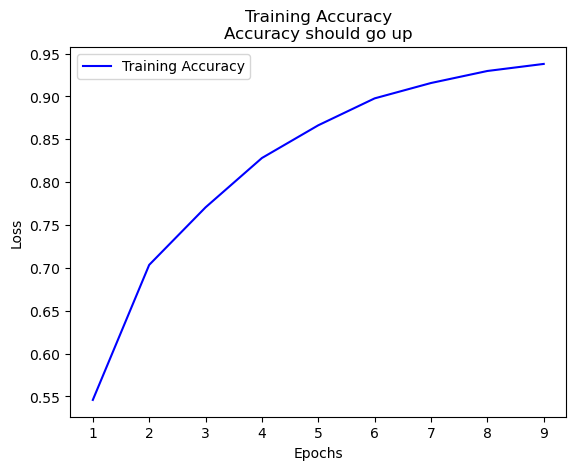

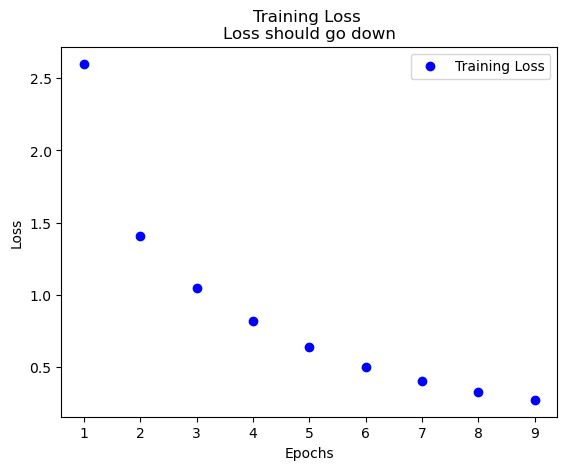

71/71 [==============================] - 0s 985us/step - loss: 0.9178 - accuracy: 0.7956


[0.9177604913711548, 0.7956367135047913]

In [37]:
#//*** Alternate Label encoding
#//*** This method casts as an integer tensor (instead of a sparse matrix encoded tensor)
y_train = np.array(train_labels)
y_test = np.array(test_labels)
#//*** #For integer Labels - The loss function should be 'sparse_categorical_crossentropy'

print(y_train[0])

#//****************************
#//*** Book Supplied Settings
#//****************************
layers = 3
hidden_units = 64
first_activation = "relu"
final_activation = "softmax"
optimizer = "rmsprop"
loss = 'sparse_categorical_crossentropy'
model = build_model(
    layers=layers, 
    hidden_units = hidden_units,
    first_activation = first_activation,
    final_activation=final_activation, 
    optimizer=optimizer,
    loss=loss,metrics=['accuracy'],
    #//*** Categorical Classifier, the Findal Layer should be equal to the Total Number of Classifiers
    output_layer = (np.max(train_labels) + 1)
)
history = model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

plot_model_history(history)

results = model.evaluate(x_test, y_test)
results

## Further experiments ##
- Try using larger or smaller layers: 32 units, 128 units, and so on.
- You used two hidden layers. Now try using a single hidden layer, or three hidden layers.

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Epoch 1/9
18/18 [==============================] - 11s 592ms/step - loss: 3.0550 - accuracy: 0.5257
Epoch 2/9
18/18 [==============================] - 11s 598ms/step - loss: 0.8786 - accuracy: 0.7915
Epoch 3/9
18/18 [==============================] - 11s 636ms/step - loss: 0.4748 - accuracy: 0.8789
Epoch 4/9
18/18 [==============================] - 12s 651ms/step - loss: 0.3710 - accuracy: 0.9137
Epoch 5/9
18/18 [==============================] - 12s 649ms/step - loss: 0.1927 - accuracy: 0.9492
Epoch 6/9
18/18 [==============================] - 12s 654ms/step - loss: 0.1563 - accuracy: 0.9512
Epoch 7/9
18/18 [==============================] - 12s 649ms/step - loss: 0.1462 - accuracy: 0.9503
Epoch 8/9
18/18 [==============================] - 12s 652ms/step - loss: 0.1368 - accuracy: 0.9471
Epoch 9/9
18/18 [==============================] - 12s 652m

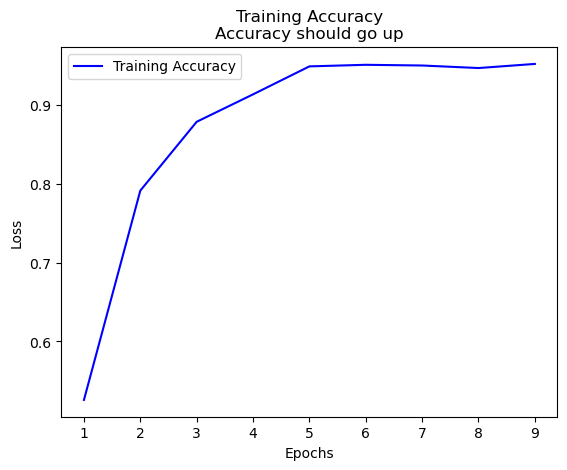

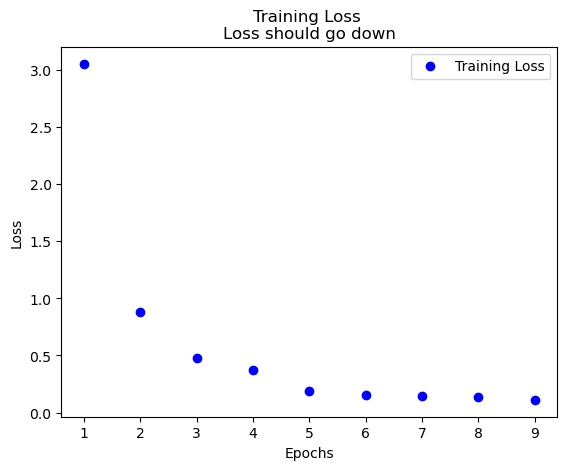

71/71 [==============================] - 2s 23ms/step - loss: 1.4691 - accuracy: 0.7845


[1.4690574407577515, 0.7845057845115662]

In [44]:
#//*** Try a larger layer

#//*** Encode Labels using Keras to_categorical. Returns Sparse Matrix for the Labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
#//*** Use Loss Functions 'categorical_crossentropy' for Sparse Matrix Categoricals
#//*** Displays labels
print(y_train[0])

layers = 3
hidden_units = 5000
first_activation = "relu"
final_activation = "softmax"
optimizer = "rmsprop"
loss = 'categorical_crossentropy'
model = build_model(
    layers=layers, 
    hidden_units = hidden_units,
    first_activation = first_activation,
    final_activation=final_activation, 
    optimizer=optimizer,
    loss=loss,metrics=['accuracy'],
    #//*** Categorical Classifier, the Findal Layer should be equal to the Total Number of Classifiers
    output_layer = (np.max(train_labels) + 1)
)
history = model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

plot_model_history(history)

results = model.evaluate(x_test, y_test)
results

In [45]:
model.predict(x_test)

array([[2.3098184e-05, 1.1434501e-04, 3.0994298e-07, ..., 4.3895230e-07,
        3.3933580e-09, 1.0391491e-08],
       [2.6360143e-02, 1.1021660e-01, 4.7626547e-03, ..., 1.3227408e-03,
        4.1350038e-04, 1.9265359e-03],
       [7.3221745e-03, 7.4792886e-01, 1.0115582e-03, ..., 4.5362267e-05,
        2.4255909e-05, 4.8168622e-05],
       ...,
       [1.7279215e-18, 7.5388534e-13, 7.4093282e-21, ..., 6.0184257e-24,
        2.9832300e-29, 4.4508605e-26],
       [1.5984932e-02, 8.8159055e-02, 4.5590354e-03, ..., 2.4482547e-03,
        5.4147886e-04, 1.2020848e-03],
       [3.0369174e-03, 5.2485794e-01, 3.6196187e-03, ..., 7.6811921e-05,
        1.3787427e-05, 3.5026849e-05]], dtype=float32)